In [1]:
import pandas as pd

# Load auction data
auction_path = "Auction_Stats/ipl_auction_data_2018_2025.csv"
df_auction = pd.read_csv(auction_path)

# Preview the data
print("Shape:", df_auction.shape)
df_auction.head()


Shape: (1638, 4)


,Player Name,Team Name,Price,Year
0,Ms dhoni,Chennai Super Kings,15 crore,2018
1,Suresh Raina,Chennai Super Kings,11 crore,2018
2,Deepak chahar,Chennai Super Kings,8 crore,2018
3,Kedar jadhav,Chennai Super Kings,7.8 crore,2018
4,Ravindra jadeja,Chennai Super Kings,7 crore,2018


In [2]:
df_auction['Team Name'] = df_auction['Team Name'].replace({
    'Kings XI Punjab': 'Punjab Kings'
})


In [3]:
def convert_numeric_price(value):
    try:
        value = float(value)
        if value > 1e7:  # e.g., 142500000
            return round(value / 1e7, 2)
    except:
        return value
    return value

# Apply only to those rows
df_auction.loc[599:655, 'Price'] = df_auction.loc[599:655, 'Price'].apply(convert_numeric_price)


In [4]:
import re

def clean_price_symbol(row):
    if isinstance(row, str):
        # Remove non-numeric characters (except commas and digits)
        cleaned = re.sub(r'[^\d,]', '', row)
        cleaned = cleaned.replace(",", "")
        try:
            return round(int(cleaned) / 1e7, 2)
        except:
            return None
    return row

df_auction.loc[808:1011, 'Price'] = df_auction.loc[808:1011, 'Price'].apply(clean_price_symbol)


In [5]:
# Reload original 'Price' column before dropping if you haven't
# If it's already dropped, skip to the next cell

# Handle '15 crore'-style prices
def convert_price_string(price):
    if pd.isna(price):
        return None
    if isinstance(price, str) and 'crore' in price.lower():
        try:
            return float(price.lower().replace("crore", "").strip())
        except:
            return None
    return price

# Apply to whole column if not done yet
df_auction['Price_Cr'] = df_auction['Price_Cr'].fillna(
    df_auction['Price'].apply(convert_price_string)
)


KeyError: 'Price_Cr'

In [6]:
import re

# Full price conversion function
def clean_price(price):
    if pd.isna(price):
        return None

    # Case 1: Already float or int
    try:
        price = float(price)
        if price > 1e7:
            return round(price / 1e7, 2)
        else:
            return round(price, 2)
    except:
        pass

    # Case 2: '15 crore'
    if isinstance(price, str) and 'crore' in price.lower():
        try:
            return float(price.lower().replace("crore", "").strip())
        except:
            return None

    # Case 3: ₹1,50,00,000 or corrupted versions
    if isinstance(price, str):
        # Remove non-digit characters
        cleaned = re.sub(r'[^\d]', '', price)
        try:
            return round(int(cleaned) / 1e7, 2)
        except:
            return None

    return None

# Apply to entire 'Price' column
df_auction['Price_Cr'] = df_auction['Price'].apply(clean_price)

# Preview cleaned prices
df_auction[['Player Name', 'Price', 'Price_Cr']].head(10)


,Player Name,Price,Price_Cr
0,Ms dhoni,15 crore,15.0
1,Suresh Raina,11 crore,11.0
2,Deepak chahar,8 crore,8.0
3,Kedar jadhav,7.8 crore,7.8
4,Ravindra jadeja,7 crore,7.0
5,Dwayne bravo,6.4 crore,6.4
6,Karn sharma,5 crore,5.0
7,Shane watson,4 crore,4.0
8,Shardul thakur,2.6 crore,2.6
9,Ambati rayudu,2.2 crore,2.2


In [7]:
# Save cleaned auction data to CSV
df_auction.to_csv("cleaned_ipl_auction_data.csv", index=False)


In [44]:
import os

base_folder = r"C:\Users\Asus\OneDrive\Desktop\LS 2025\IPL_ML\Performance Stats"

# List all files in the folder
files = os.listdir(base_folder)

print(" Files found in folder:")
for f in files:
    print(f)


 Files found in folder:
most_wickets_2018.csv
most_wickets_2019.csv
most_wickets_2020.csv
most_wickets_2021.csv
most_wickets_2022.csv
most_wickets_2023.csv
most_wickets_2024.csv
most_wickets_2025.csv
top_run_scorers_2018.csv
top_run_scorers_2019.csv
top_run_scorers_2020.csv
top_run_scorers_2021.csv
top_run_scorers_2022.csv
top_run_scorers_2023.csv
top_run_scorers_2024.csv
top_run_scorers_2025.csv


In [14]:
import os
import pandas as pd

base_folder = r"C:\Users\Asus\OneDrive\Desktop\LS 2025\IPL_ML\Performance Stats"

wickets_dfs = []
batting_dfs = []

# Loop through all CSV files
for file in os.listdir(base_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(base_folder, file)
        df = pd.read_csv(file_path)

        # Extract year
        year_digits = ''.join(filter(str.isdigit, file))
        if not year_digits:
            continue
        df["Year"] = int(year_digits)

        file_lower = file.lower()

        if "most_wickets" in file_lower:
            wickets_dfs.append(df)
        elif "top_run_scorers" in file_lower:
            batting_dfs.append(df)

# Merge and save most wickets
if wickets_dfs:
    df_wickets = pd.concat(wickets_dfs, ignore_index=True)
    df_wickets.to_csv("most_wickets_merged.csv", index=False)
    print("✅ Saved: most_wickets_merged.csv")
else:
    print("⚠️ No 'most_wickets' files matched.")

# Merge and save top run scorers
if batting_dfs:
    df_batting = pd.concat(batting_dfs, ignore_index=True)
    df_batting.to_csv("top_run_scorers_merged.csv", index=False)
    print("✅ Saved: top_run_scorers_merged.csv")
else:
    print("⚠️ No 'top_run_scorers' files matched.")


✅ Saved: most_wickets_merged.csv
✅ Saved: top_run_scorers_merged.csv


In [18]:
import pandas as pd

# Load merged bowling file
df_wickets = pd.read_csv("most_wickets_merged.csv")

# Required columns
required_cols = [
    "BowlerName", "TeamName", "Matches", "TotalRunsConceded", "DotBallsBowled",
    "ScoringBallsBowled", "BowlingAverage", "StrikeRate", "BoundaryPercentage",
    "BoundaryFrequency", "EconomyRate", "OversBowled", "Wides", "NoBalls",
    "Wickets", "Maidens", "FourWickets", "FiveWickets", "Hattricks", "Year"

]

# Filter and save
df_wickets_cleaned = df_wickets[required_cols]
df_wickets_cleaned.to_csv("most_wickets_cleaned.csv", index=False)

print("✅ Saved: most_wickets_cleaned.csv")


✅ Saved: most_wickets_cleaned.csv


In [19]:
import pandas as pd

# Load merged batting file
df_batting = pd.read_csv("top_run_scorers_merged.csv")

# Keep only required columns
columns_to_keep = [
    "StrikerName", "TeamName", "Matches", "TotalRuns", "Balls", "Dotballs",
    "StrikeRate", "Fours", "Sixes", "Outs", "NotOuts", "BattingAverage",
    "FiftyPlusRuns", "Centuries", "HighestScore", "Year"
]

df_batting_cleaned = df_batting[columns_to_keep]

# Save cleaned version
df_batting_cleaned.to_csv("top_run_scorers_cleaned.csv", index=False)
print("✅ Saved: top_run_scorers_cleaned.csv")


✅ Saved: top_run_scorers_cleaned.csv


In [22]:
import pandas as pd

# Load cleaned files
df_auction = pd.read_csv("cleaned_ipl_auction_data.csv")
df_batting = pd.read_csv("top_run_scorers_cleaned.csv")
df_bowling = pd.read_csv("most_wickets_cleaned.csv")

# Standardize player name columns
df_batting = df_batting.rename(columns={"StrikerName": "Player_Name"})
df_bowling = df_bowling.rename(columns={"BowlerName": "Player_Name"})
df_auction = df_auction.rename(columns={"Player Name": "Player_Name"})

# Merge batting + bowling
df_performance = pd.merge(
    df_batting,
    df_bowling,
    on=["Player_Name", "Year"],
    how="outer",
    suffixes=("_bat", "_bowl")
)

# Merge with auction
df_final = pd.merge(
    df_performance,
    df_auction,
    on=["Player_Name", "Year"],
    how="inner"
)

# Save to CSV
df_final.to_csv("merged_ipl_dataset.csv", index=False)
print("✅ Saved: merged_ipl_dataset.csv")
print("🧾 Shape:", df_final.shape)


✅ Saved: merged_ipl_dataset.csv
🧾 Shape: (532, 37)


In [23]:
import pandas as pd

# Load merged dataset
df = pd.read_csv("merged_ipl_dataset.csv")

# Drop rows with missing Price_Cr
df = df.dropna(subset=["Price_Cr"])

print("✅ After dropping rows with missing Price_Cr:")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Optional: Save intermediate version
df.to_csv("ipl_dataset_step1.csv", index=False)


✅ After dropping rows with missing Price_Cr:
Rows: 532
Columns: 37


In [24]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=["number"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Fill numeric columns with 0
df[numeric_cols] = df[numeric_cols].fillna(0)

# Fill categorical columns with "Unknown"
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Check remaining nulls (should be 0)
print("🧼 Remaining missing values:", df.isna().sum().sum())


🧼 Remaining missing values: 0


In [25]:
# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include=["object"]).columns

# Exclude Player_Name — keep it for merging/reference, not model input
categorical_cols = [col for col in categorical_cols if col not in ["Player_Name"]]

# One-Hot Encode
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("✅ One-hot encoding complete.")
print("🔢 Final shape:", df_encoded.shape)


✅ One-hot encoding complete.
🔢 Final shape: (532, 702)


In [26]:
# Drop non-feature columns
X = df_encoded.drop(columns=["Price_Cr", "Player_Name"])
y = df_encoded["Price_Cr"]

print("✅ Features shape:", X.shape)
print("🎯 Target shape:", y.shape)


✅ Features shape: (532, 700)
🎯 Target shape: (532,)


In [27]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Train shape:", X_train.shape)
print("🧪 Test shape:", X_test.shape)


✅ Train shape: (425, 700)
🧪 Test shape: (107, 700)


In [28]:
# Save training data
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

# Save testing data
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("✅ All cleaned datasets saved:")
print("- X_train.csv")
print("- y_train.csv")
print("- X_test.csv")
print("- y_test.csv")


✅ All cleaned datasets saved:
- X_train.csv
- y_train.csv
- X_test.csv
- y_test.csv


📈 Model Performance:
✅ R² Score: 0.313
📉 MAE: ₹2.20 Cr
📉 RMSE: ₹3.58 Cr


C:\Users\Asus\AppData\Local\Temp\ipykernel_21544\4045411798.py:38: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


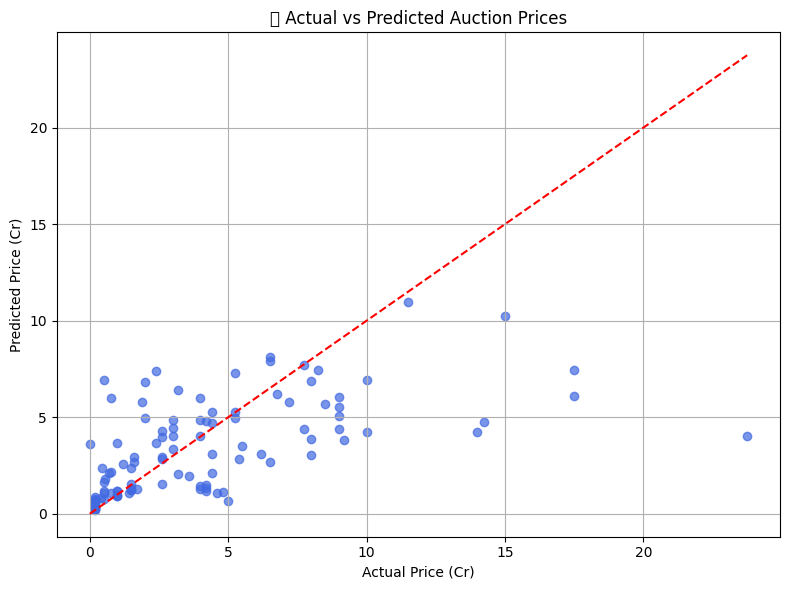

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load training and testing sets (in case you're starting fresh)
import pandas as pd
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # flatten if needed
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv").values.ravel()

# 1. Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 2. Predict
y_pred = model.predict(X_test)

# 3. Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📈 Model Performance:")
print(f"✅ R² Score: {r2:.3f}")
print(f"📉 MAE: ₹{mae:.2f} Cr")
print(f"📉 RMSE: ₹{rmse:.2f} Cr")

# 4. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price (Cr)")
plt.ylabel("Predicted Price (Cr)")
plt.title("🎯 Actual vs Predicted Auction Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 6.8/150.0 MB 28.0 MB/s eta 0:00:06
   --- ------------------------------------ 12.8/150.0 MB 26.0 MB/s eta 0:00:06
   ---- ----------------------------------- 15.7/150.0 MB 22.5 MB/s eta 0:00:06
   ---- ----------------------------------- 17.6/150.0 MB 20.1 MB/s eta 0:00:07
   ---- ----------------------------------- 18.6/150.0 MB 16.5 MB/s eta 0:00:08
   ----- ---------------------------------- 19.1/150.0 MB 14.7 MB/s eta 0:00:09
   ----- ---------------------------------- 19.4/150.0 MB 12.9 MB/s eta 0:00:11
   ----- ---------------------------------- 19.4/150.0 MB 12.9 MB/s eta 0:00:11
   ----- ---------------------------------- 19.7/150.0 MB 9.9 MB/s eta 0:00:14
   ----- ---------------------------------- 19.7/150.0 MB 9.9 MB/s eta 0:00:14
   ----- ---------------------------------- 19.9/150.


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Initialize model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)

# 2. Train
xgb_model.fit(X_train, y_train)

# 3. Predict
y_pred_xgb = xgb_model.predict(X_test)

# 4. Evaluate
r2 = r2_score(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("📈 XGBoost Performance:")
print(f"✅ R² Score: {r2:.3f}")
print(f"📉 MAE: ₹{mae:.2f} Cr")
print(f"📉 RMSE: ₹{rmse:.2f} Cr")


📈 XGBoost Performance:
✅ R² Score: 0.408
📉 MAE: ₹2.03 Cr
📉 RMSE: ₹3.32 Cr


C:\Users\Asus\AppData\Local\Temp\ipykernel_21544\1925987071.py:11: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


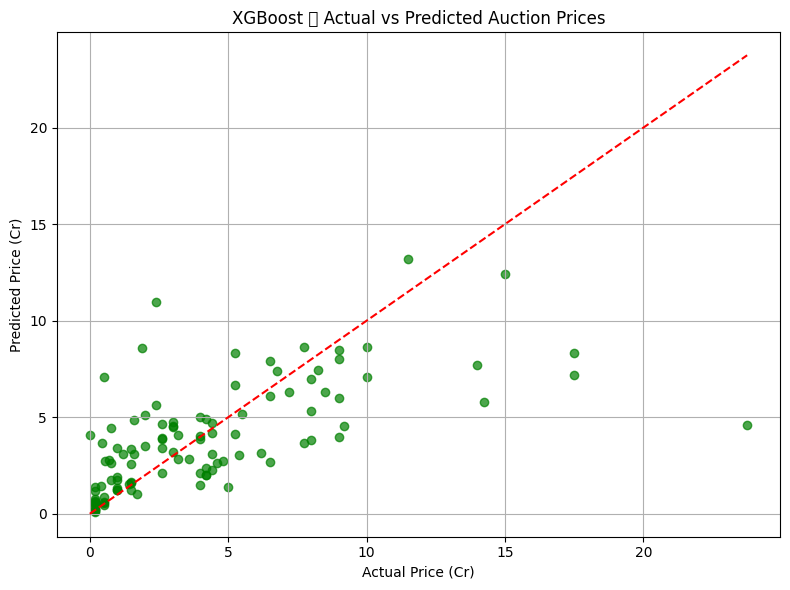

In [32]:
import matplotlib.pyplot as plt

# Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Price (Cr)")
plt.ylabel("Predicted Price (Cr)")
plt.title("XGBoost 🎯 Actual vs Predicted Auction Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_grid,
    n_iter=15, cv=5, verbose=1, n_jobs=-1, scoring='r2'
)

random_search.fit(X_train, y_train)

print("✅ Best Params:", random_search.best_params_)

# Best model
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 15 candidates, totalling 75 fits
✅ Best Params: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


C:\Users\Asus\AppData\Local\Temp\ipykernel_21544\2832066056.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features, y=top_features.index, palette="viridis")
C:\Users\Asus\AppData\Local\Temp\ipykernel_21544\2832066056.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


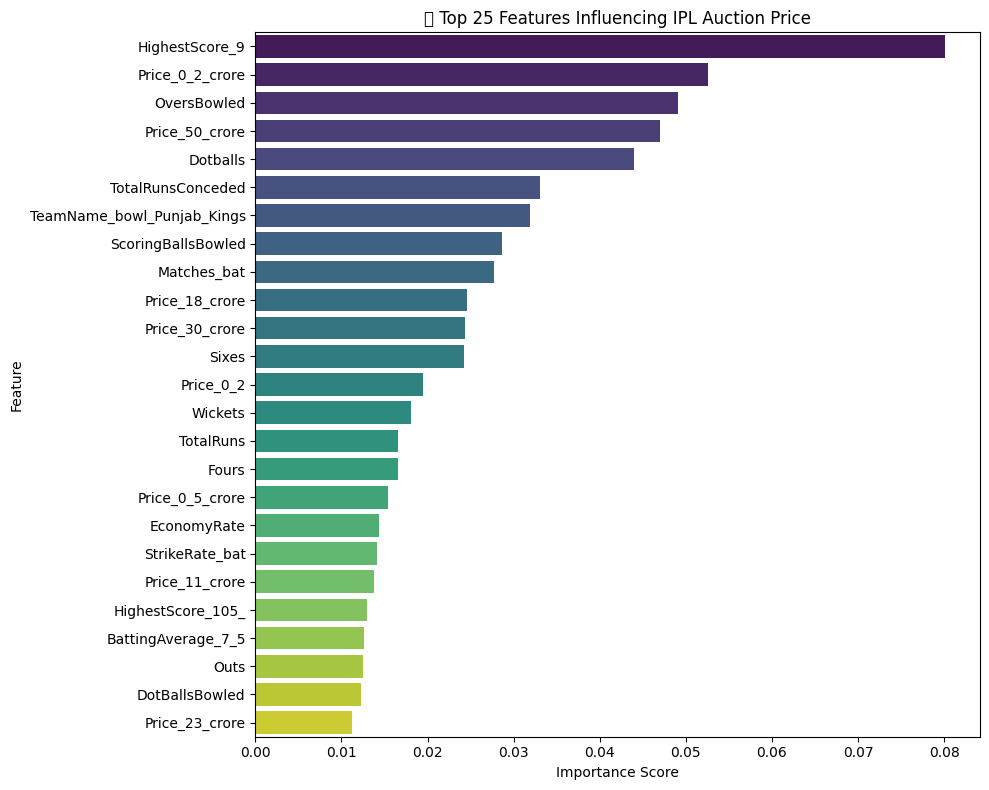

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = feature_importances.sort_values(ascending=False).head(25)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("📊 Top 25 Features Influencing IPL Auction Price")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred_best = best_xgb.predict(X_test)

r2 = r2_score(y_test, y_pred_best)
mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print("📈 Tuned XGBoost Performance:")
print(f"✅ R² Score: {r2:.3f}")
print(f"📉 MAE: ₹{mae:.2f} Cr")
print(f"📉 RMSE: ₹{rmse:.2f} Cr")


📈 Tuned XGBoost Performance:
✅ R² Score: 0.428
📉 MAE: ₹2.07 Cr
📉 RMSE: ₹3.26 Cr


In [41]:
# Load 2025 player performance stats (already preprocessed like X_train)
X_2025 = pd.read_csv("player_stats_2025.csv")

# Clean column names (must match training set)
X_2025.columns = X_2025.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Ensure same columns as training set
X_2025 = X_2025.reindex(columns=X_train.columns, fill_value=0)

# Predict 2026 prices
predicted_prices_2026 = best_xgb.predict(X_2025)

# Attach to player names if available
X_2025['Predicted_Price_2026_Cr'] = predicted_prices_2026

# Save to CSV
X_2025.to_csv("ipl_predicted_prices_2026.csv", index=False)
print("✅ Saved: ipl_predicted_prices_2026.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'player_stats_2025.csv'

In [42]:
# Filter players from 2025 season
df_2025 = df[df["Year"] == 2025].copy()
print("✅ Players in 2025:", df_2025.shape)


# Drop columns not used in modeling (like actual price)
df_2025_features = df_2025.drop(["Price", "Price_Cr"], axis=1, errors='ignore')

# One-hot encode same way
df_2025_encoded = pd.get_dummies(df_2025_features)

# Clean column names
df_2025_encoded.columns = df_2025_encoded.columns.str.replace('[^A-Za-z0-9_]+', '_', regex=True)

# Match training feature columns
df_2025_encoded = df_2025_encoded.reindex(columns=X_train.columns, fill_value=0)


✅ Players in 2025: (72, 37)


In [43]:
# Predict 2026 prices
predicted_prices_2026 = best_xgb.predict(df_2025_encoded)

# Attach to names
df_2025["Predicted_Price_2026_Cr"] = predicted_prices_2026

# Save to CSV
df_2025[["Player_Name", "Predicted_Price_2026_Cr"]].to_csv("ipl_predicted_prices_2026.csv", index=False)
print("✅ Saved predicted prices to ipl_predicted_prices_2026.csv")


✅ Saved predicted prices to ipl_predicted_prices_2026.csv
